# Imports

In [22]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import numpy as np

# Load data

In [23]:
df_performance = pandas.read_csv('performance_test.csv', sep=";")
df_performance

,Model,Q3,SE Q3,Reproduced?
0,SeqVec baseline embeddings,71.6,0.5,1
1,SeqVec MSA embeddings,NaN,NaN,0
2,SeqVec MSA Consensus,NaN,NaN,0
3,SeqVec PSSMConcat,75.2,0.4,1
4,SeqVec PSSMSplit,74.5,0.5,1
5,Bert baseline embeddings,80.9,0.4,1
6,Bert MSA embeddings,81.7,0.4,1
7,Bert MSA Consensus,80.8,0.4,1
8,Bert PSSMConcat,80.5,0.4,1
9,Bert PSSMSplit,80.9,0.4,1


In [24]:
labels = df_performance['Model']
q3 = df_performance['Q3']
se = df_performance['SE Q3']
majority_class_performance = df_performance['Q3'][16]
difference_to_random = [entry - majority_class_performance for entry in q3]

In [25]:
df_models = pandas.read_csv('overview_method_performances.csv', sep=";")
df_models

,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
0,bindPredictML17,0.0,F1-all,34.000,CI: 2,PR ligand binding,TestSet225,Performance: https://www.biorxiv.org/content/1...
1,ConSeq-19equal,0.0,MCC,0.206,CI: 0.010,PR effect,PMD4k,Performance: https://link.springer.com/article...
2,ConSeq-19equal,0.0,Q2,71.510,CI:0.39,PR effect,PMD4k,Performance: https://link.springer.com/article...
3,NetSurfP-2.0,0.0,Q3,82.000,SE: 1.6,PR secondary structure,CASP12,Performance: https://www.biorxiv.org/content/1...
4,DeepLoc (localization),0.0,Q10,78.000,/,PP localization,DeepLoc Test,Performance: https://www.biorxiv.org/content/1...
...,...,...,...,...,...,...,...,...
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* need to check
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,Enzyme Prediction,NaN,NaN


In [26]:
df_models_sorted = df_models.sort_values(by=['Prediction type', 'Embedding based', 'Method'])
df_models_sorted_no_nan = df_models_sorted.dropna()

grouped_mcc_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Method']
grouped_qx_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Method']
grouped_f1_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('F1')]['Method']
grouped_precision_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Precision')]['Method']
grouped_spearman_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Spearman')]['Method']
grouped_recall_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Recall')]['Method']
grouped_fmax_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Fmax')]['Method']

mcc = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Performance']
qx = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Performance']
f1 = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("F1")]['Performance']
precision = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Precision")]['Performance']
spearman = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Spearman")]['Performance']
recall = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Recall")]['Performance']
fmax = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Fmax")]['Performance']

mcc_is_embedding_based = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Embedding based']
qx_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Embedding based']
f1_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("F1")]['Embedding based']
precision_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Precision")]['Embedding based']
spearman_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Spearman")]['Embedding based']
recall_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Recall")]['Embedding based']
fmax_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Fmax")]['Embedding based']


df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Fmax")]


,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
35,DomFun (BPO),0.0,Fmax (BPO),49.2,/,PP GO Function (BPO),CAFA3,https://bmcbioinformatics.biomedcentral.com/ar...
36,GOLabeler (BPO),0.0,Fmax (BPO),40.0,CI: 1,PP GO Function (BPO),CAFA3,https://genomebiology.biomedcentral.com/track/...
34,goPredSim (BPO),1.0,Fmax (BPO),37.0,CI: 2,PP GO Function (BPO),CAFA3,https://www.nature.com/articles/s41598-020-807...
41,DomFun (CCO),0.0,Fmax(CCO),60.2,/,PP GO Function (CCO),CAFA3,https://bmcbioinformatics.biomedcentral.com/tr...
42,GOLabeler (CCO),0.0,Fmax(CCO),61.0,CI: 1,PP GO Function (CCO),CAFA3,https://bmcbioinformatics.biomedcentral.com/tr...
40,goPredSim (CCO),1.0,Fmax (CCO),57.0,CI: 2,PP GO Function (CCO),CAFA3,https://www.nature.com/articles/s41598-020-807...
38,DomFun (MFO),0.0,Fmax (MFO),62.4,/,PP GO Function (MFO),CAFA3,https://bmcbioinformatics.biomedcentral.com/ar...
39,GOLabeler (MFO),0.0,Fmax(MFO),62.0,CI: 1,PP GO Function (MFO),CAFA3,https://bmcbioinformatics.biomedcentral.com/tr...
37,goPredSim (MFO),1.0,Fmax (MFO),50.0,CI: 3,PP GO Function (MFO),CAFA3,https://www.nature.com/articles/s41598-020-807...


# Plot embedding performances

## Plot horizontally

In [27]:
y_pos = np.arange(len(labels))

seperator_seqvec = y_pos[4] + (y_pos[5] - y_pos[4])/2
seperator_bert = y_pos[9] + (y_pos[10] - y_pos[9])/2
seperator_t5 = y_pos[14] + (y_pos[15] - y_pos[14])/2

Plot Q3 only

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


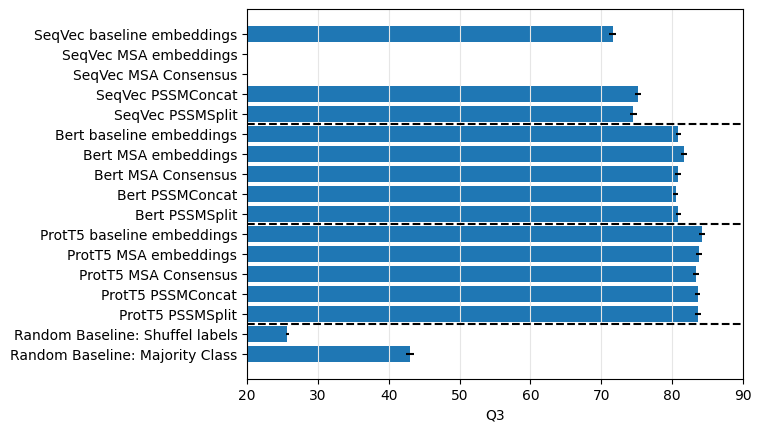

In [28]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, q3, xerr=se, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([20, 90])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

Without baselines

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


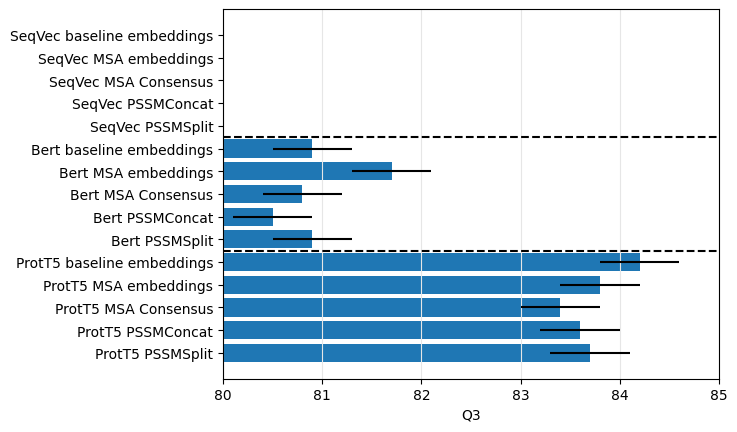

In [29]:
y_pos_no_baseline = np.arange(len(labels[:15]))
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos_no_baseline, q3[:15], xerr=se[:15], align='center')
ax.set_yticks(y_pos_no_baseline, labels=labels[:15])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([80, 85])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

Plot difference to majority class prediction

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


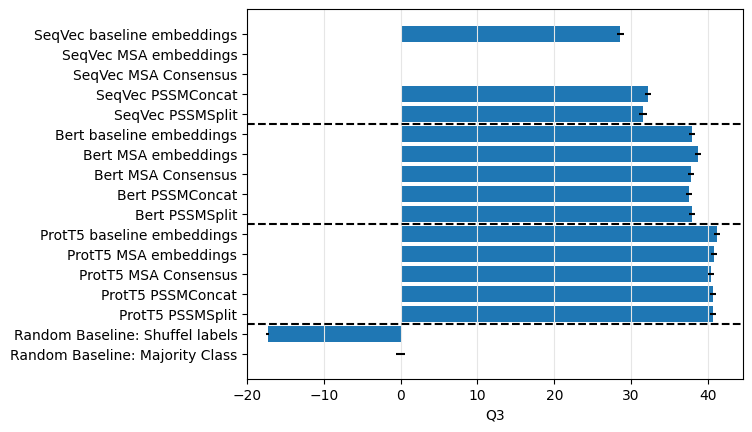

In [30]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))

bars = ax.barh(y_pos, difference_to_random, xerr=se, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim(left=-20)
# ax.bar_label(bars) IndexError

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

## Plot vertically

In [31]:
x_pos = np.arange(len(labels))

seperator_seqvec = x_pos[4] + (x_pos[5] - x_pos[4])/2
seperator_bert = x_pos[9] + (x_pos[10] - x_pos[9])/2
seperator_t5 = x_pos[14] + (x_pos[15] - x_pos[14])/2

Plot Q3 only

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\1554389190.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


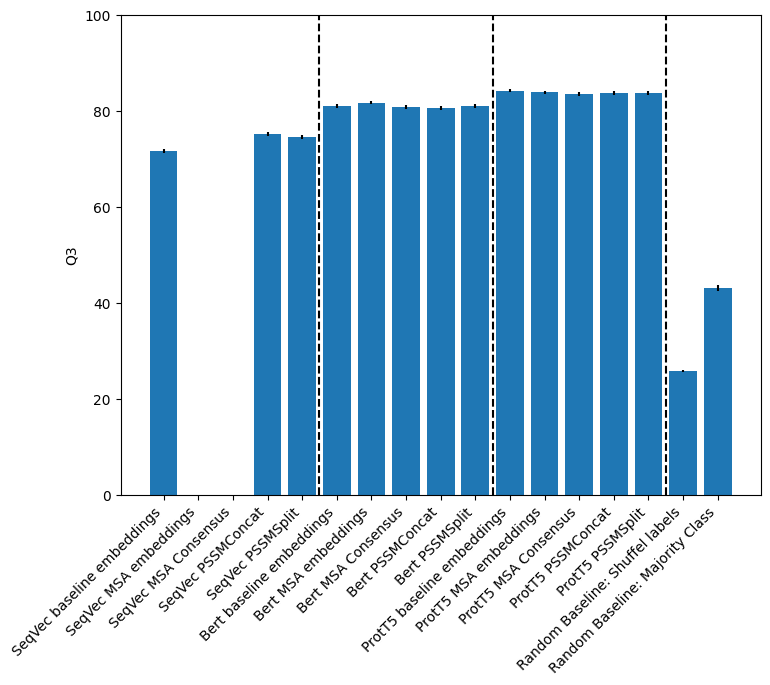

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(labels, q3, yerr=se)
ax.set_ylim([0, 100])
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Q3')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

Plot difference to majority class prediction

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\456156945.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


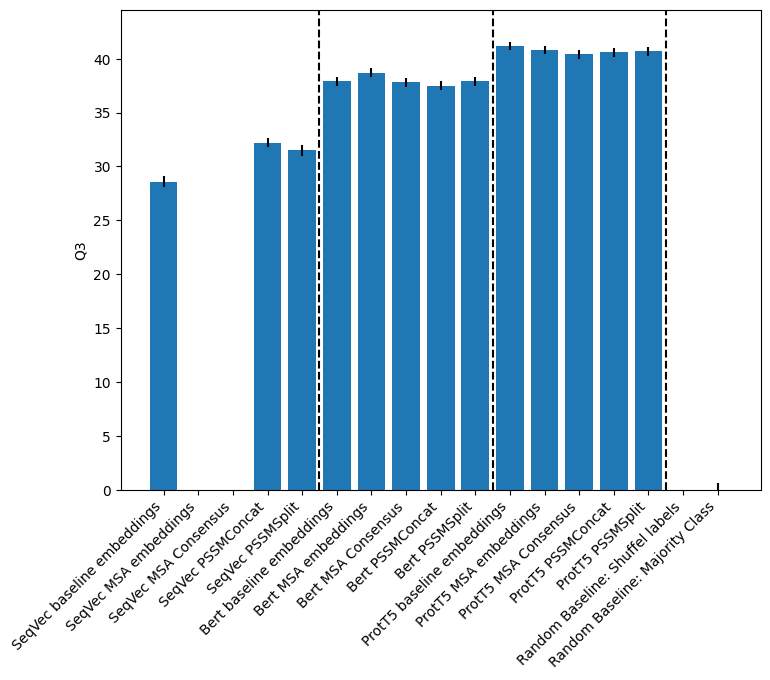

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_pos = np.arange(len(labels))


ax.bar(labels, difference_to_random, yerr=se)
ax.set_ylim(bottom=0)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Q3')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

# Plot Conservation from embeddings vs. Embeddings + Evolutionary Information (MSAs)

<span style="color:red">TODO!</span>

# Plot SOTA with Evolutionary Information vs. Embeddings

<span style="color:red">TODO: caluclate random for all tasks, more tasks</span>

C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2711058039.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_mcc_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2711058039.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.axvline(x=[2.5],  color='black', ls='--')


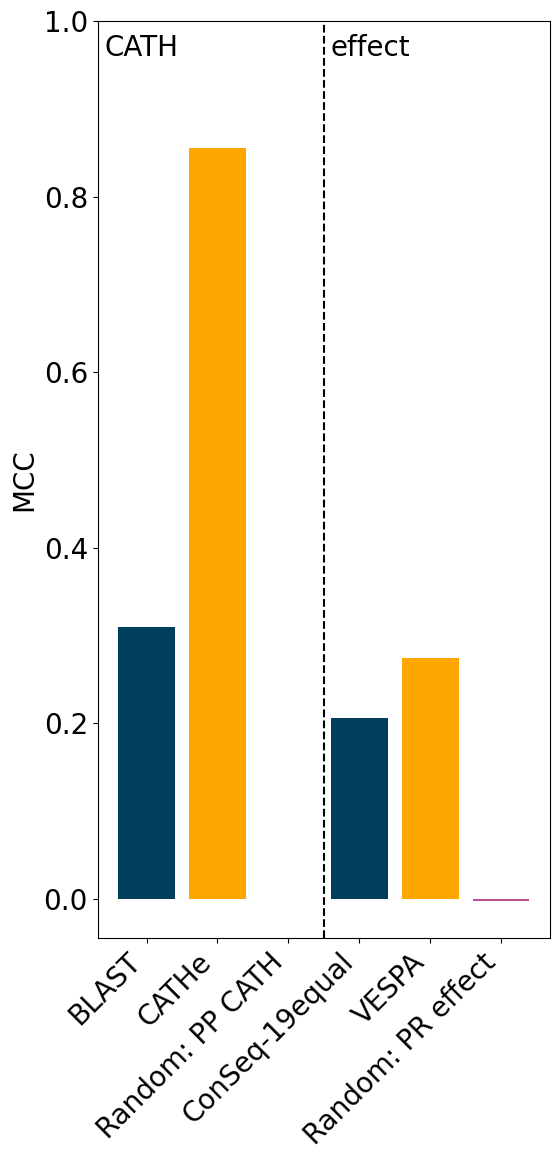

In [34]:
plt.rcParams['font.size'] = '20'

fig1, ((ax1)) = plt.subplots(1,1, figsize=(6,12))
ax1.bar(grouped_mcc_labels, [float(entry) for entry in mcc], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in mcc_is_embedding_based], width=0.8)
ax1.set_xticklabels(grouped_mcc_labels, rotation=45, ha='right')
ax1.set_ylabel("MCC")
ax1.set_ylim(top=1)
ax1.annotate('CATH',xy=(-0.6, 0.96))
ax1.annotate('effect',xy=(2.6, 0.96))
ax1.axvline(x=[2.5],  color='black', ls='--')

grouped_qx_labels_as_strings = [str(entry) for entry in grouped_qx_labels]
qx_bars_as_float = [float(entry) for entry in qx]
qx_colors = ['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in qx_is_embedding_based]

fig1.tight_layout()



C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\1197465137.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(grouped_qx_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\1197465137.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.axvline(x=[3.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\1197465137.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.axvline(x=[6.5],  color='black', ls='--')


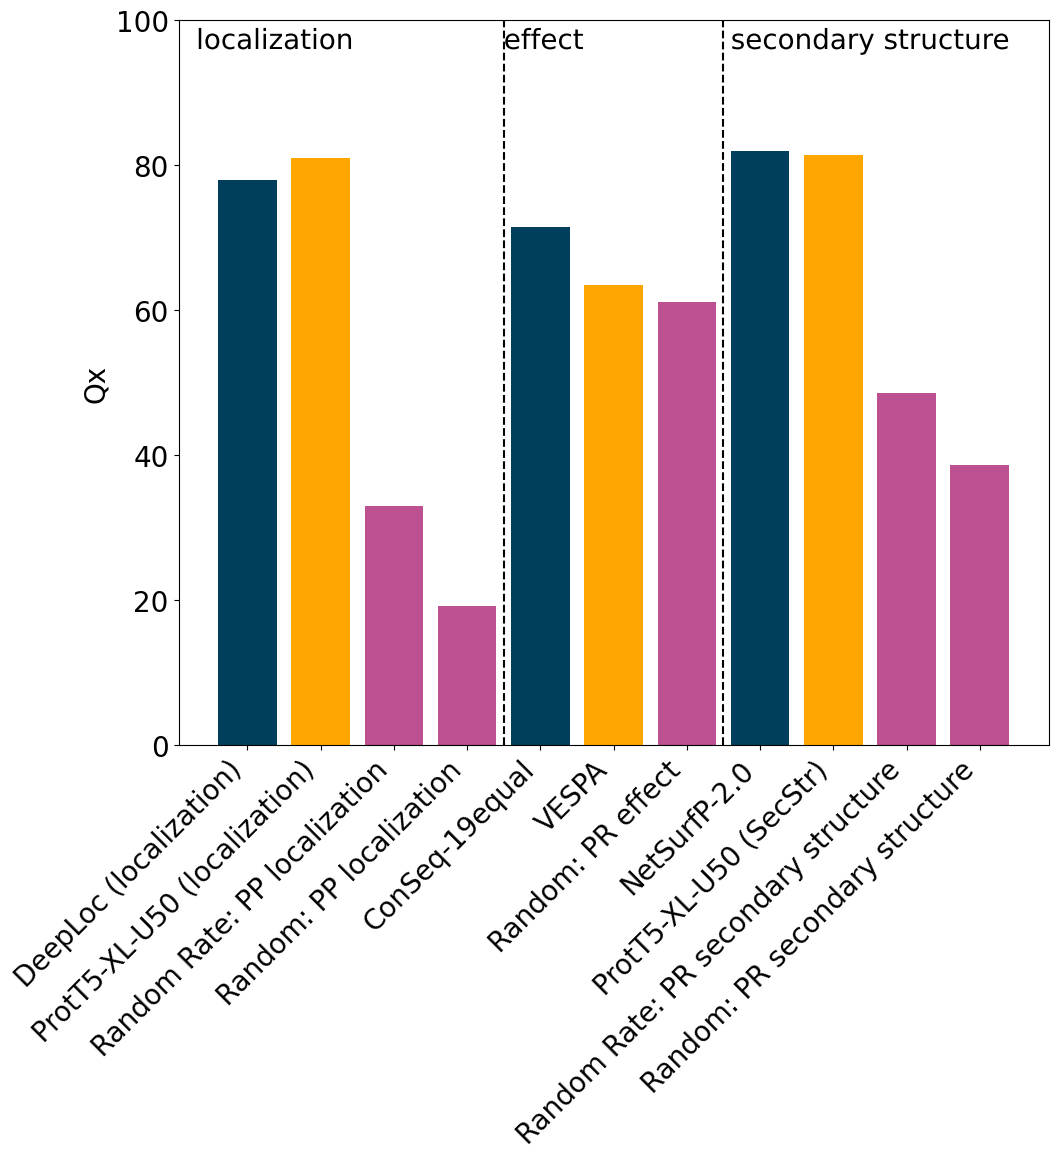

In [35]:
fig2, ((ax2)) = plt.subplots(1,1, figsize=(11,12))

ax2.bar(grouped_qx_labels_as_strings, qx_bars_as_float, color=qx_colors, width=0.8)
ax2.set_xticklabels(grouped_qx_labels, rotation=45, ha='right')
ax2.set_ylabel("Qx")
ax2.set_ylim(top=100)
ax2.annotate('localization',xy=(-0.7, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.annotate('effect',xy=(3.5, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.annotate('secondary structure',xy=(6.6, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.axvline(x=[3.5],  color='black', ls='--')
ax2.axvline(x=[6.5],  color='black', ls='--')

fig2.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2493299344.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(grouped_f1_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2493299344.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax3.axvline(x=[2.5],  color='black', ls='--')


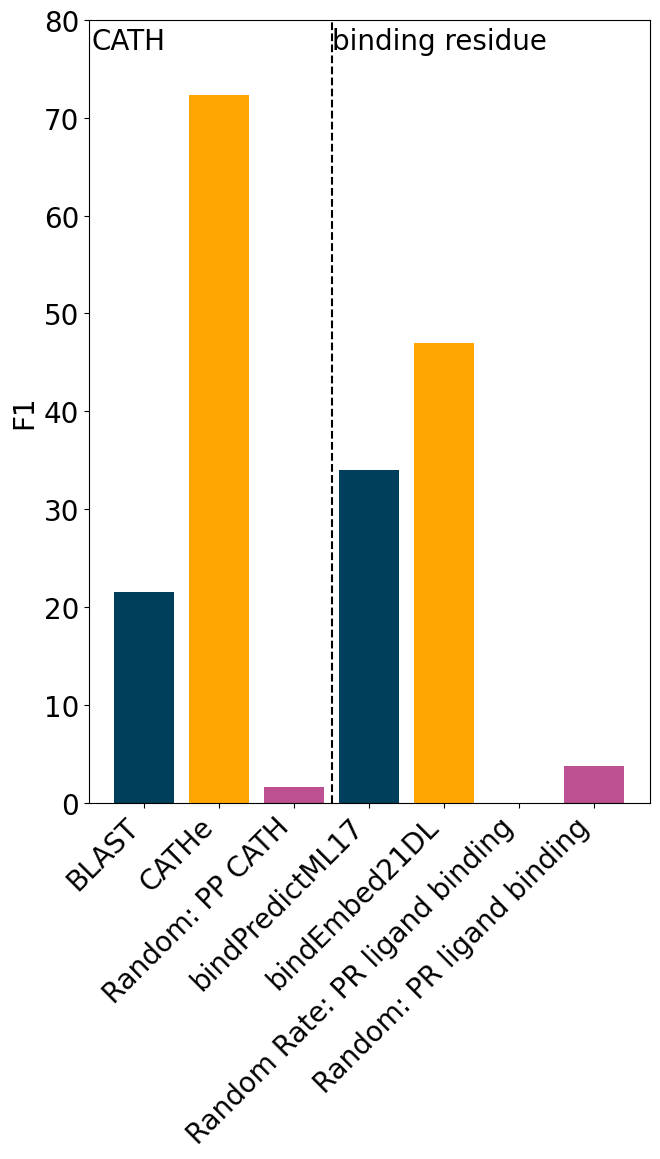

In [36]:
fig3, ((ax3)) = plt.subplots(1,1, figsize=(7,12))
ax3.bar(grouped_f1_labels, [float(entry) for entry in f1], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in f1_is_embedding_based], width=0.8)
ax3.set_xticklabels(grouped_f1_labels, rotation=45, ha='right')
ax3.set_ylabel("F1")
ax3.set_ylim(top=80)
ax3.annotate('CATH',xy=(-0.7, 77))
ax3.annotate('binding residue',xy=(2.5, 77))
ax3.axvline(x=[2.5],  color='black', ls='--')

fig3.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2003957379.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(grouped_precision_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2003957379.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax4.axvline(x=[1.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2003957379.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax4.axvline(x=[3.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2003957379.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5

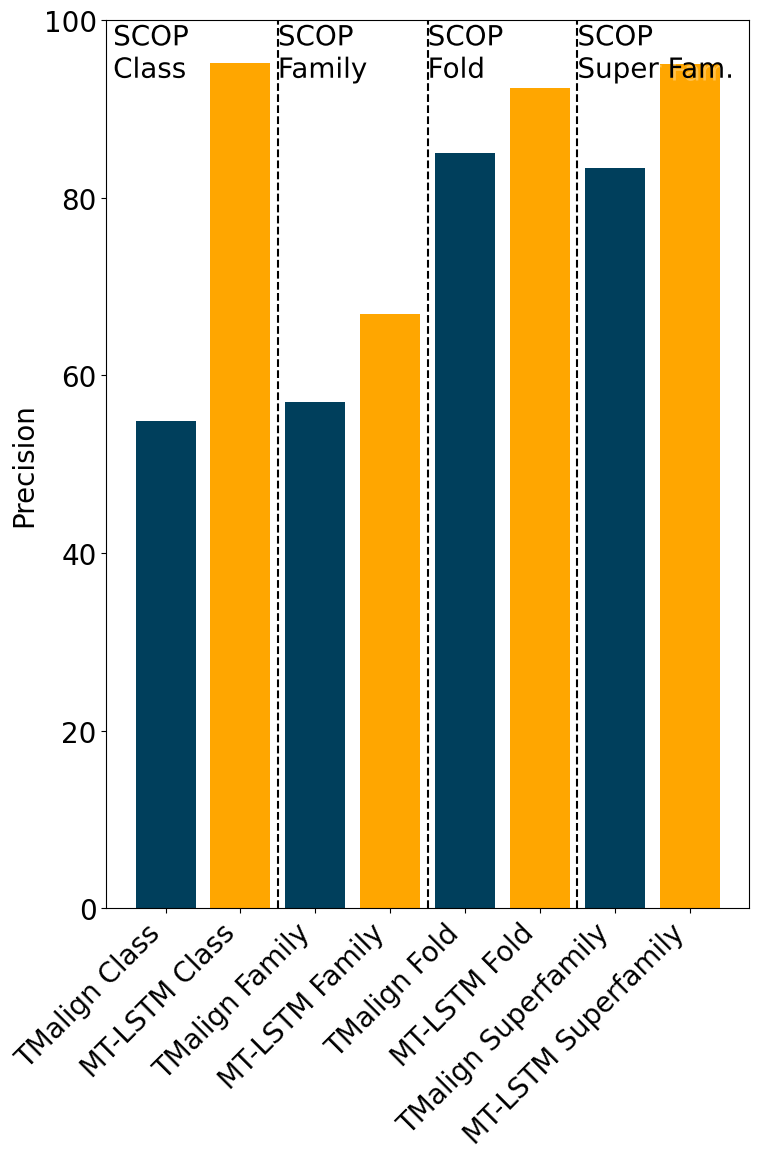

In [37]:
fig4, ((ax4)) = plt.subplots(1,1, figsize=(8,12))

ax4.bar(grouped_precision_labels, [float(entry) for entry in precision], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in precision_is_embedding_based], width=0.8)
ax4.set_xticklabels(grouped_precision_labels, rotation=45, ha='right')
ax4.set_ylabel("Precision")
ax4.set_ylim(top=100)
ax4.annotate('SCOP\nClass',xy=(-0.7, 93.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP\nFamily',xy=(1.5, 93.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP\nFold',xy=(3.5, 93.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP\nSuper Fam.',xy=(5.5, 93.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.axvline(x=[1.5],  color='black', ls='--')
ax4.axvline(x=[3.5],  color='black', ls='--')
ax4.axvline(x=[5.5],  color='black', ls='--')

fig4.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\137676973.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(grouped_spearman_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\137676973.py:9: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax5.axvline(x=[1.5],  color='black', ls='--')


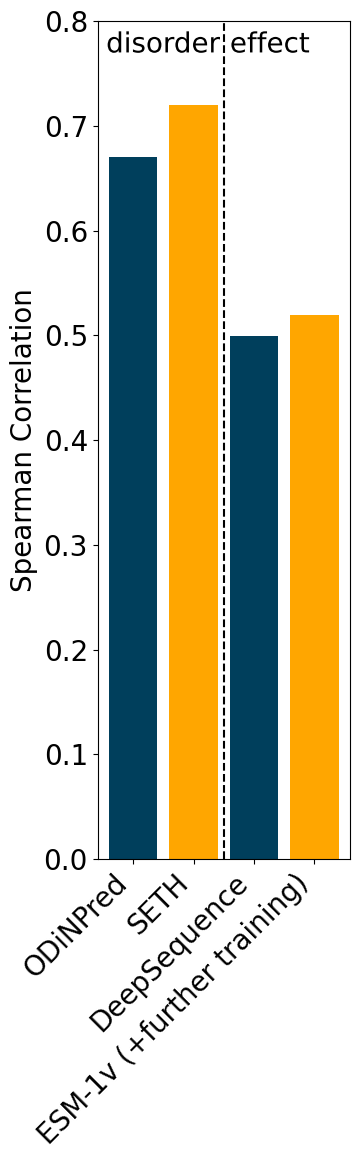

In [38]:
fig5, ((ax5)) = plt.subplots(1,1, figsize=(4,12))

ax5.bar(grouped_spearman_labels, [float(entry) for entry in spearman], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in spearman_is_embedding_based], width=0.8)
ax5.set_xticklabels(grouped_spearman_labels, rotation=45, ha='right')
ax5.set_ylabel("Spearman Correlation")
ax5.set_ylim(top=.8)
ax5.annotate('disorder',xy=(-0.45, 0.77), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax5.annotate('effect',xy=(1.6, 0.77), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax5.axvline(x=[1.5],  color='black', ls='--')

fig5.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2936341620.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(grouped_recall_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2936341620.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\2936341620.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6.axvline(x=[5.5],  color='black', ls='--')


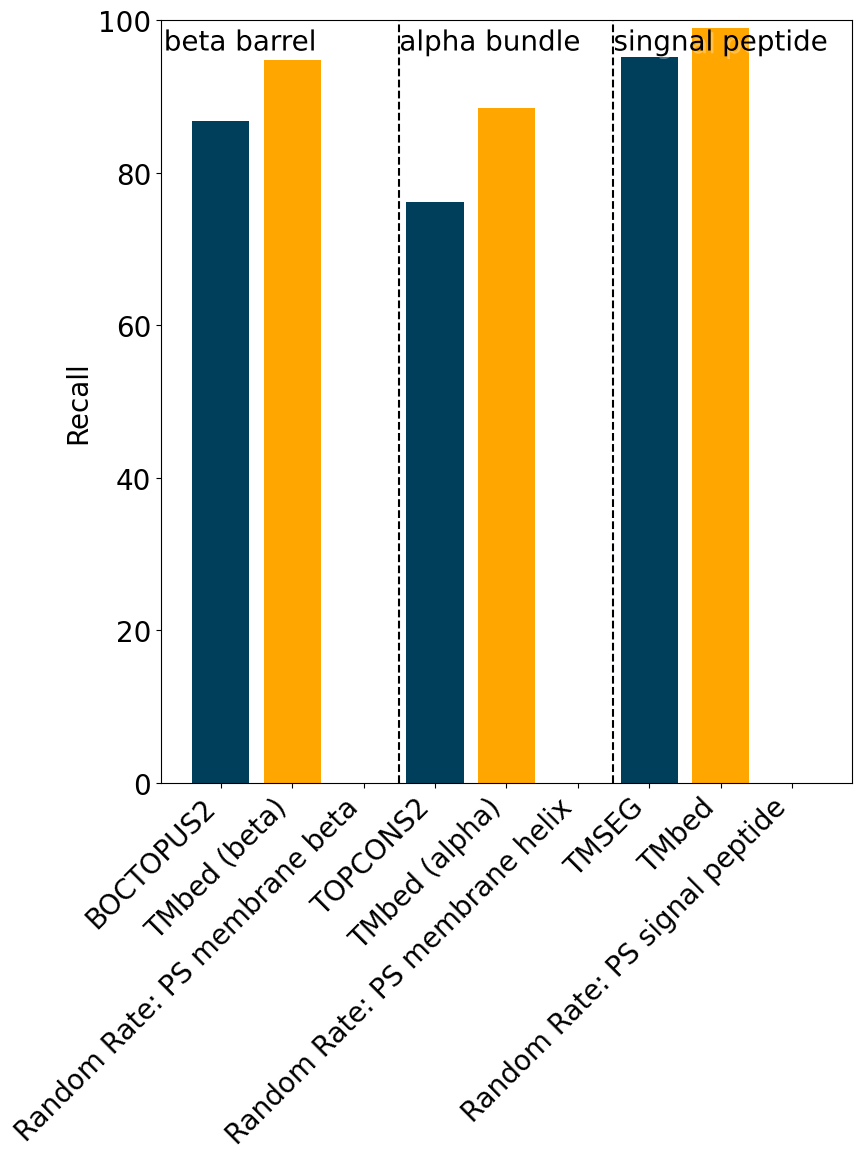

In [39]:
fig6, ((ax6)) = plt.subplots(1,1, figsize=(9,12))

ax6.bar(grouped_recall_labels, [float(entry) for entry in recall], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in recall_is_embedding_based], width=0.8)
ax6.set_xticklabels(grouped_recall_labels, rotation=45, ha='right')
ax6.set_ylabel("Recall")
ax6.set_ylim(top=100)
ax6.annotate('beta barrel',xy=(-0.8, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.annotate('alpha bundle',xy=(2.5, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.annotate('singnal peptide',xy=(5.5, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.axvline(x=[2.5],  color='black', ls='--')
ax6.axvline(x=[5.5],  color='black', ls='--')

fig6.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\1058325911.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(grouped_fmax_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\1058325911.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax7.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_5452\1058325911.py:14: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax7.axvline(x=[5.5],  color='black', ls='--')


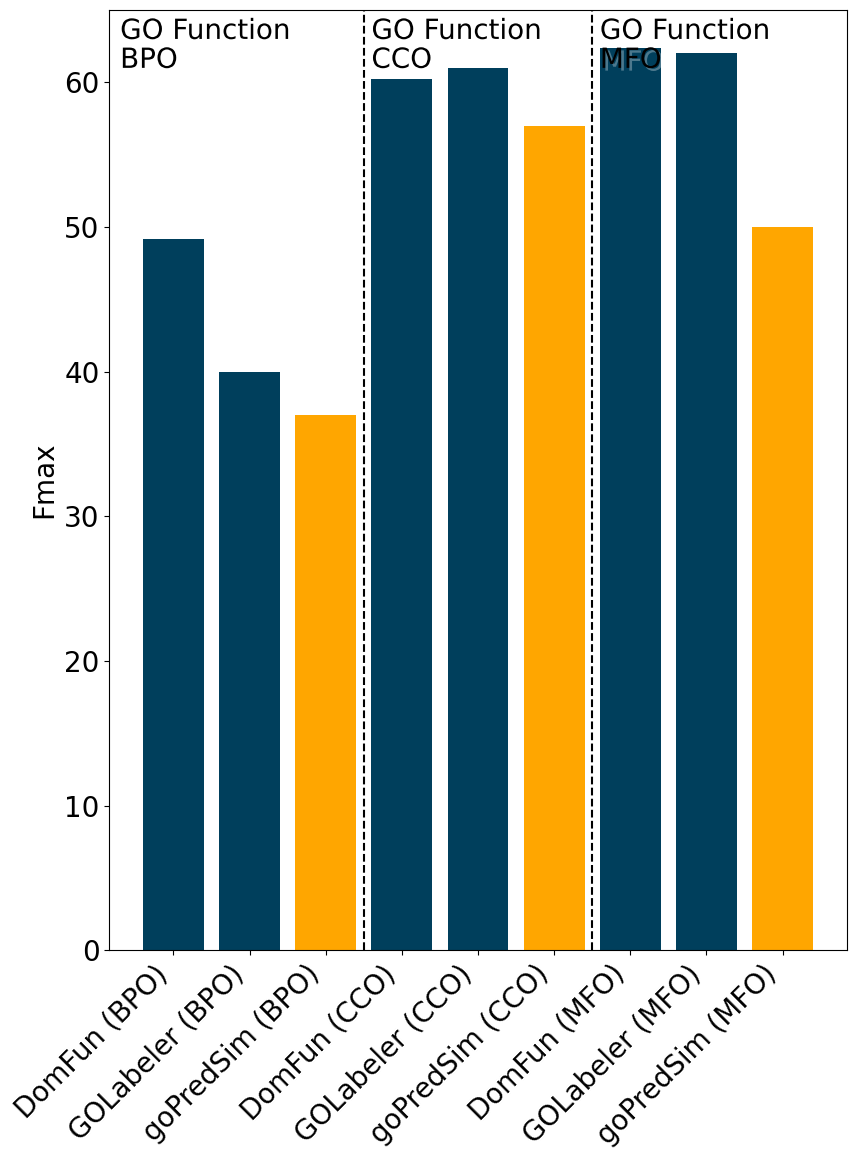

In [40]:
fig7, ((ax7)) = plt.subplots(1,1, figsize=(9,12))

ax7.bar(grouped_fmax_labels, [float(entry) for entry in fmax], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in fmax_is_embedding_based])
ax7.set_xticklabels(grouped_fmax_labels, rotation=45, ha='right')
ax7.set_ylabel("Fmax")
ax7.set_ylim(top=65)
ax7.annotate('GO Function',xy=(-0.7, 63), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.annotate('BPO',xy=(-0.7, 61), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.annotate('GO Function',xy=(2.6, 63), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.annotate('CCO',xy=(2.6, 61), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.annotate('GO Function',xy=(5.6, 63), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.annotate('MFO',xy=(5.6, 61), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.axvline(x=[2.5],  color='black', ls='--')
ax7.axvline(x=[5.5],  color='black', ls='--')

fig7.tight_layout()

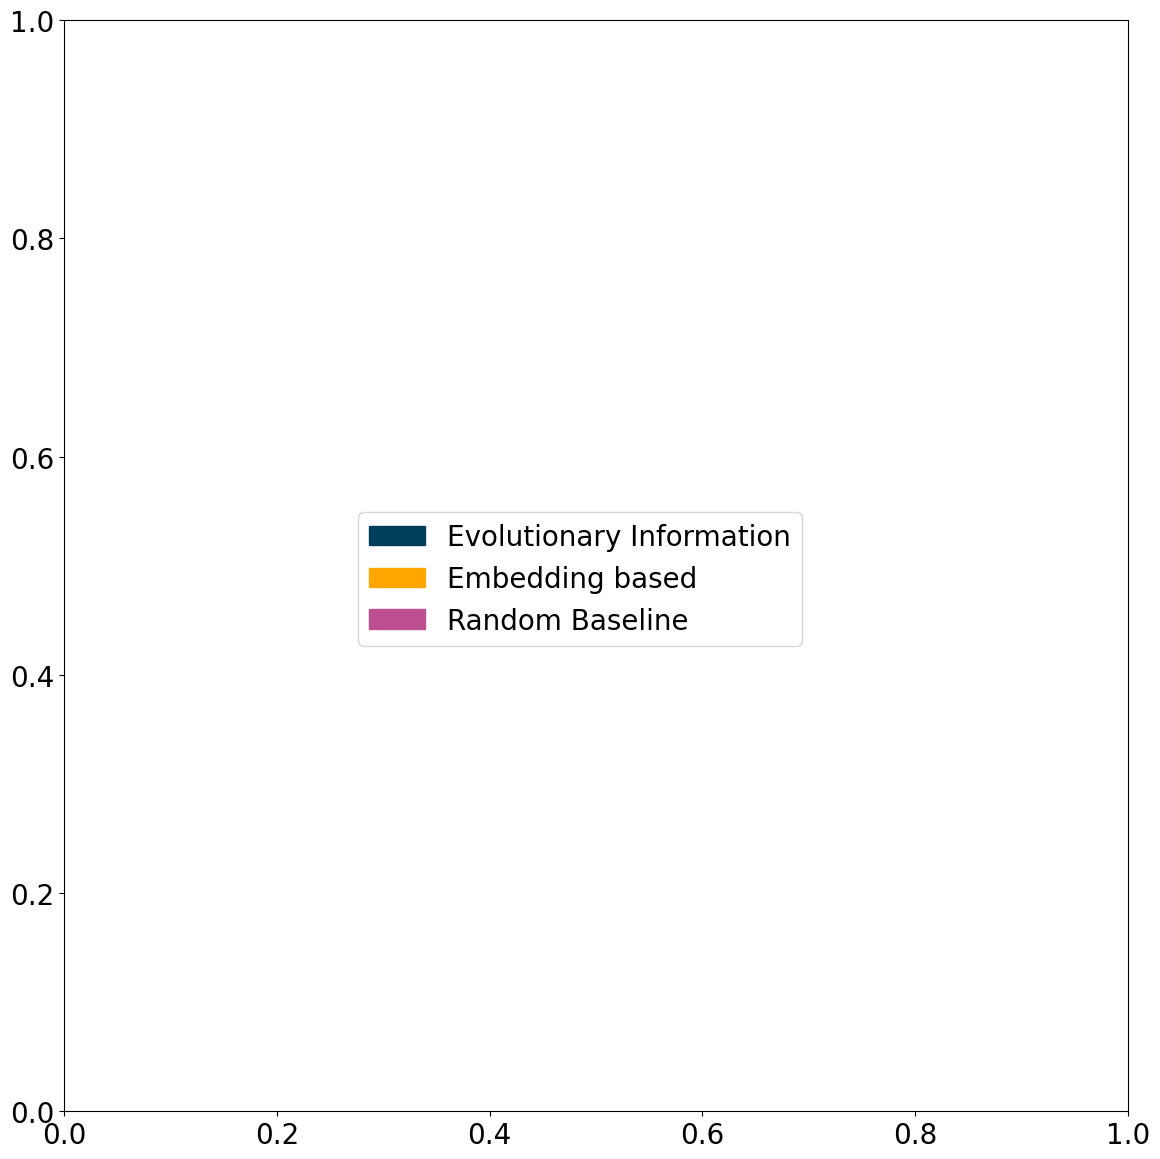

In [41]:
fig8, ((ax8)) = plt.subplots(1,1, figsize=(12,12))
legend_EI = mpatches.Patch(color='#003f5c', label='Evolutionary Information')
legend_EB = mpatches.Patch(color='#ffa600', label='Embedding based')
legend_Random = mpatches.Patch(color='#bc5090', label='Random Baseline')

fig8.legend(handles=[legend_EI, legend_EB, legend_Random], loc='center')
fig8.tight_layout()

## Information Content
Alternative to different performance measures: Compute and display information Content

In [42]:
def compute_information_content(confusion_matrix):
    cm_size = len(confusion_matrix)
    nr_samples = sum(sum(row) for row in confusion_matrix)
    a_i = [sum(row) for row in confusion_matrix]
    b_i = [0 for k in range(0, cm_size)]
    for i in range(0,cm_size):
        b_i = [x + y for x,y in zip(b_i ,[confusion_matrix[i][j] for j in range(0, cm_size)])]
    numerator = sum([a*np.log(a)for a in a_i]) - sum([confusion_matrix[i][i]*np.log(confusion_matrix[i][i])for i in range(0, cm_size)]) 
    denominator = nr_samples*np.log(nr_samples) - sum([b*np.log(b) for b in b_i]) 
    information_content = 1-numerator/denominator
    return information_content